In [7]:
#Show plots inline, and load main getdist plot module and samples class
from __future__ import print_function
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
import numpy as np
import WLbackground_cosmic_stds as BG
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from getdist import plots, MCSamples, loadMCSamples
import getdist
import matplotlib.pyplot as plt
import IPython
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
#matplotlib 2 doesn't seem to work well without usetex on
plt.rcParams['text.usetex']=True

#from matplotlib import ticker, cm, patches, pyplot


path='/Users/weikanglin/OneDrive/OneDrive - North Carolina State University/Projects/3STDs/chains_new'

def shift_parameter_R(Oms, zstars, hs):
    temp =[]
    for Om, zstar, h in zip(Oms, zstars, hs):
        temp.append(np.sqrt(Om)*BG.fC_LCDM(zstar,Om,h))
    return np.array(temp)

GetDist Version: 1.0.3, Matplotlib version: 3.1.1


In [6]:
samples = loadMCSamples(path+'/base_plikHM_TTTEEE_lowl_lowE', settings={'ignore_rows':0.3});
p = samples.getParams() 
samples.addDerived(p.theta/100.0, name='theta_star', label=r'\theta_*')
samples.addDerived(shift_parameter_R(p.omegam, p.zstar, p.H0/100), name='Rshift', label='R')
samples.addDerived(p.zstar-p.zdrag, name='Deltaz', label='\Delta z')

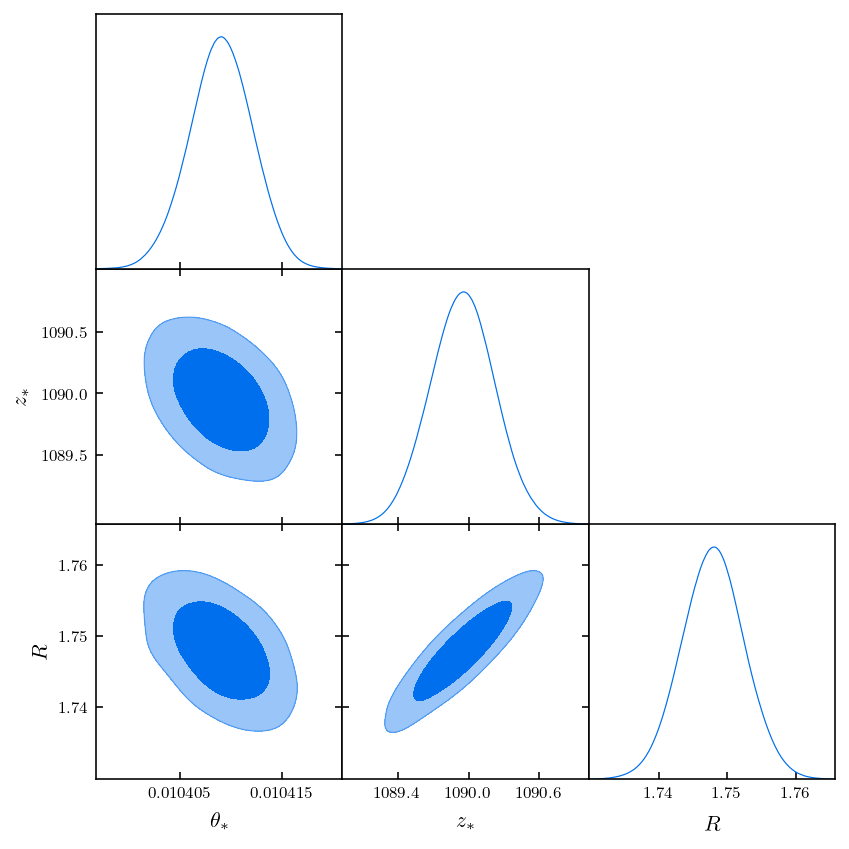

In [8]:
g = plots.getSubplotPlotter()
g.triangle_plot([samples],['theta_star','zstar','Rshift'], filled=True)

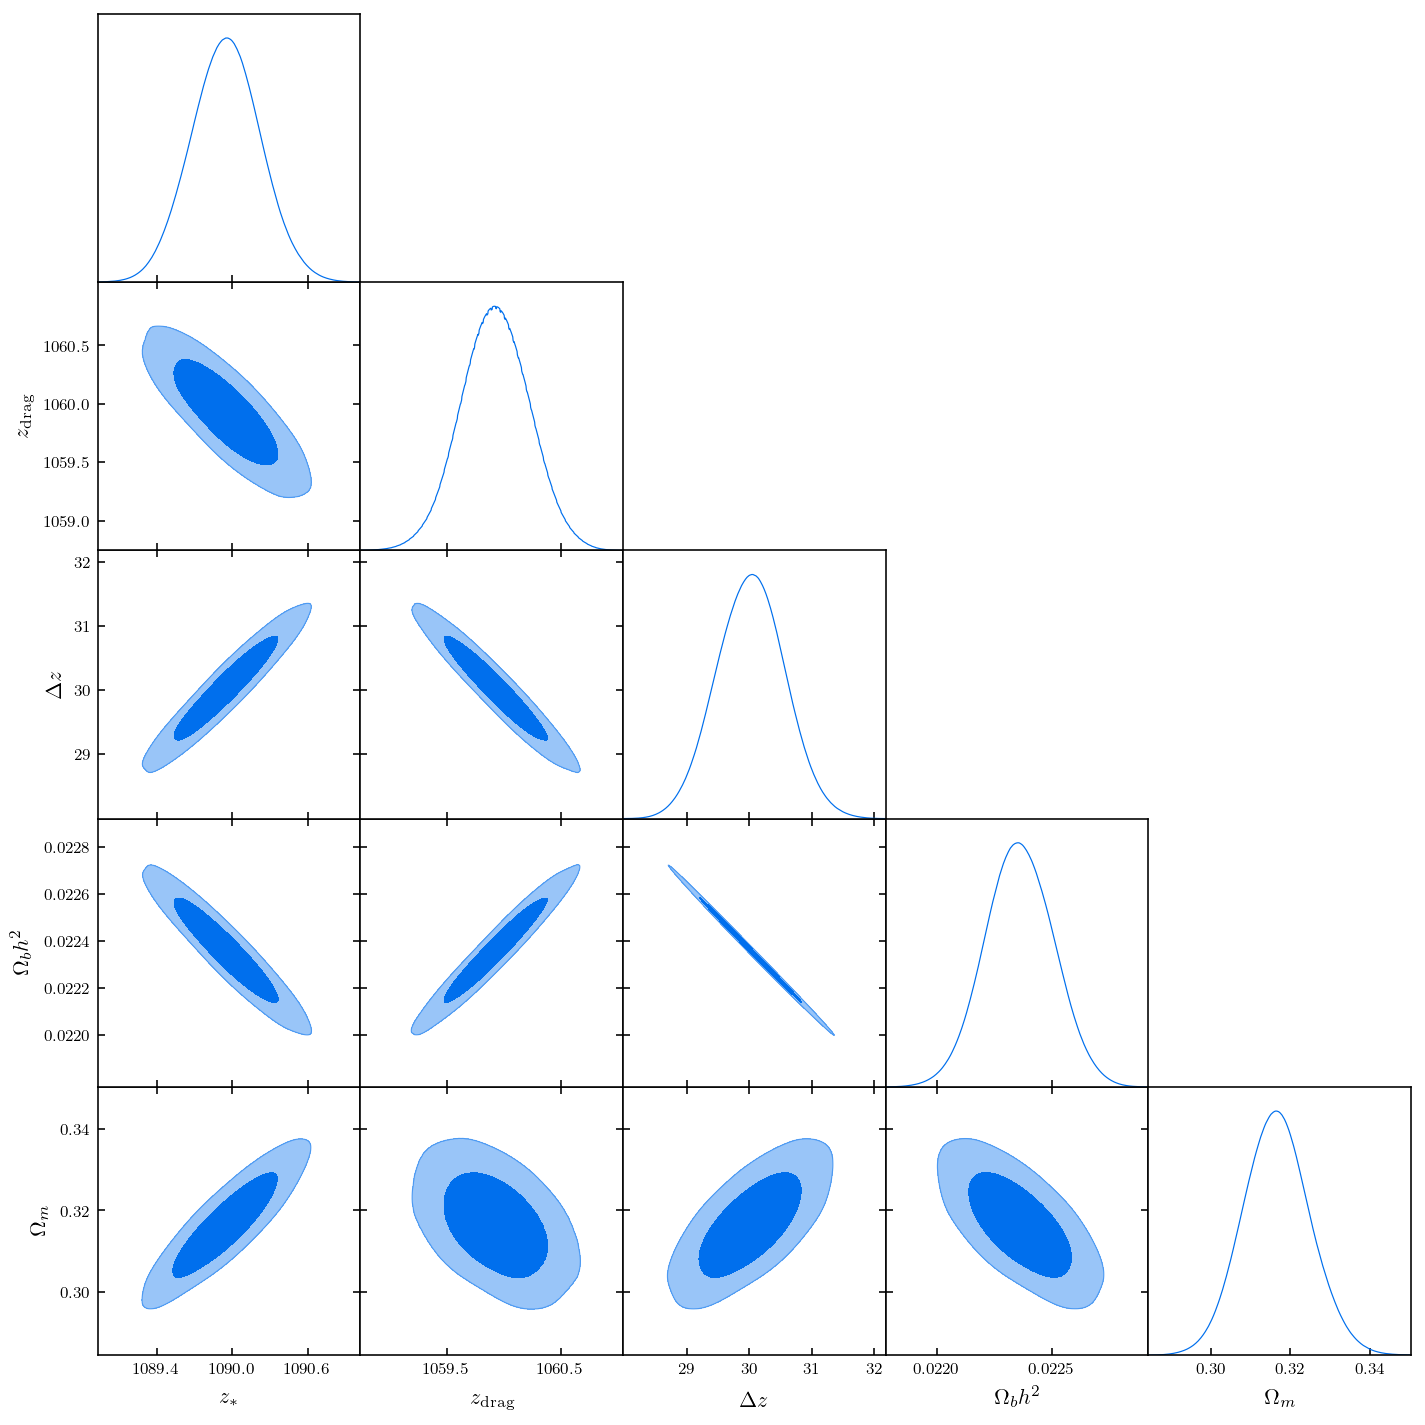

In [16]:
g = plots.getSubplotPlotter()
g.triangle_plot([samples],['zstar','zdrag','Deltaz','omegabh2','omegam'], filled=True)

In [ ]:
stats = samples.getMargeStats()
theta_star_mean = stats.parWithName('theta_star').mean
zstar_mean = stats.parWithName('zstar').mean
Rshift_mean = stats.parWithName('Rshift').mean
means=[theta_star_mean,zstar_mean,Rshift_mean]
Cov=samples.cov(['theta_star','zstar','Rshift'])

np.savetxt('CMB_theta_means_wR.txt', means)
np.savetxt('CMB_theta_Cov_wR.txt', Cov)

In [15]:
samples.std(['Deltaz','zstar','zdrag'])

array([0.54452421, 0.27447628, 0.298498  ])